In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, Dropdown

In [3]:
def nothing(x):
    pass

def binarize_image(image_path):
    # Load the image from the specified path
    image = cv.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return
    
    # Convert the image to grayscale initially
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # Function to update the displayed image based on trackbar positions
    def update_image(mode, threshold_value):
        processed_img = image.copy()
        if mode == 'gray':
            processed_img = gray_image
        elif mode == 'binary':
            _, processed_img = cv.threshold(gray_image, threshold_value, 255, cv.THRESH_BINARY)

        # Display the processed image
        plt.figure(figsize=(5, 5))
        plt.imshow(cv.cvtColor(processed_img, cv.COLOR_BGR2RGB) if mode == 'color' else processed_img, cmap='gray' if mode != 'color' else None)
        plt.axis('off')
        plt.show()
    
    # Create interactive widgets
    mode_widget = Dropdown(options=['color', 'gray', 'binary'], value='color', description='Mode:')
    threshold_widget = IntSlider(value=0, min=0, max=255, step=1, description='Threshold:')
    
    # Link the widgets to the update function
    interact(update_image, mode=mode_widget, threshold_value=threshold_widget)

# Example usage
image_path = r'C:\Users\Yassine\Desktop\Fundamentals of Image Segmentation\grains.png'
image = cv.imread(image_path)

if image is not None:
    binarize_image(image_path)
else:
    print(f"Error: Could not load image from {image_path}")


Error: Could not load image from C:\Users\Yassine\Desktop\Fundamentals of Image Segmentation\grains.png


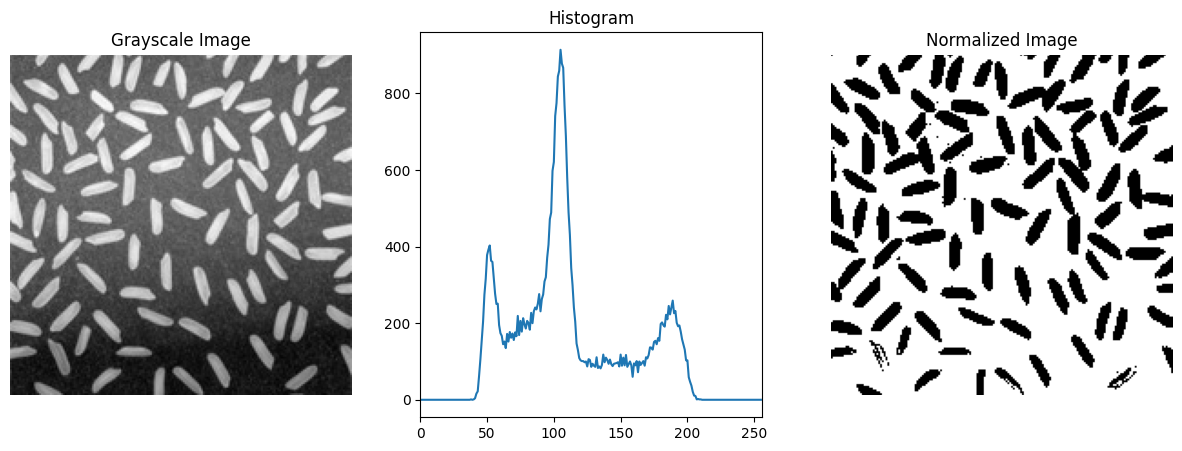

In [3]:
def image_normalize(image):
    # Convert the image to grayscale
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # Calculate the histogram of the grayscale image
    hist = cv.calcHist([gray_image], [0], None, [256], [0, 256])
    
    # Normalize the grayscale image
    normalized_image = ((gray_image - np.min(gray_image)) * 255 / (np.max(gray_image) - np.min(gray_image))).astype(np.uint8)
    
    # Create a figure to display all images in a single line
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display the grayscale image
    axs[0].imshow(gray_image, cmap='gray')
    axs[0].set_title("Grayscale Image")
    axs[0].axis('off')
    
    # Display the histogram
    axs[1].plot(hist)
    axs[1].set_title("Histogram")
    axs[1].set_xlim([0, 256])
    
    # Display the normalized image
    axs[2].imshow(normalized_image, cmap='gray')
    axs[2].set_title("Normalized Image")
    axs[2].axis('off')
    
    # Show the figure
    plt.show()
    
    return 0


# Example usage
image_path = r'C:\Users\Yassine\Desktop\git\Segm\TPs_Segmentation/grains.png'
image = cv.imread(image_path)
if image is not None:
    image_normalize(image)
else:
    print(f"Error: Could not load image from {image_path}")


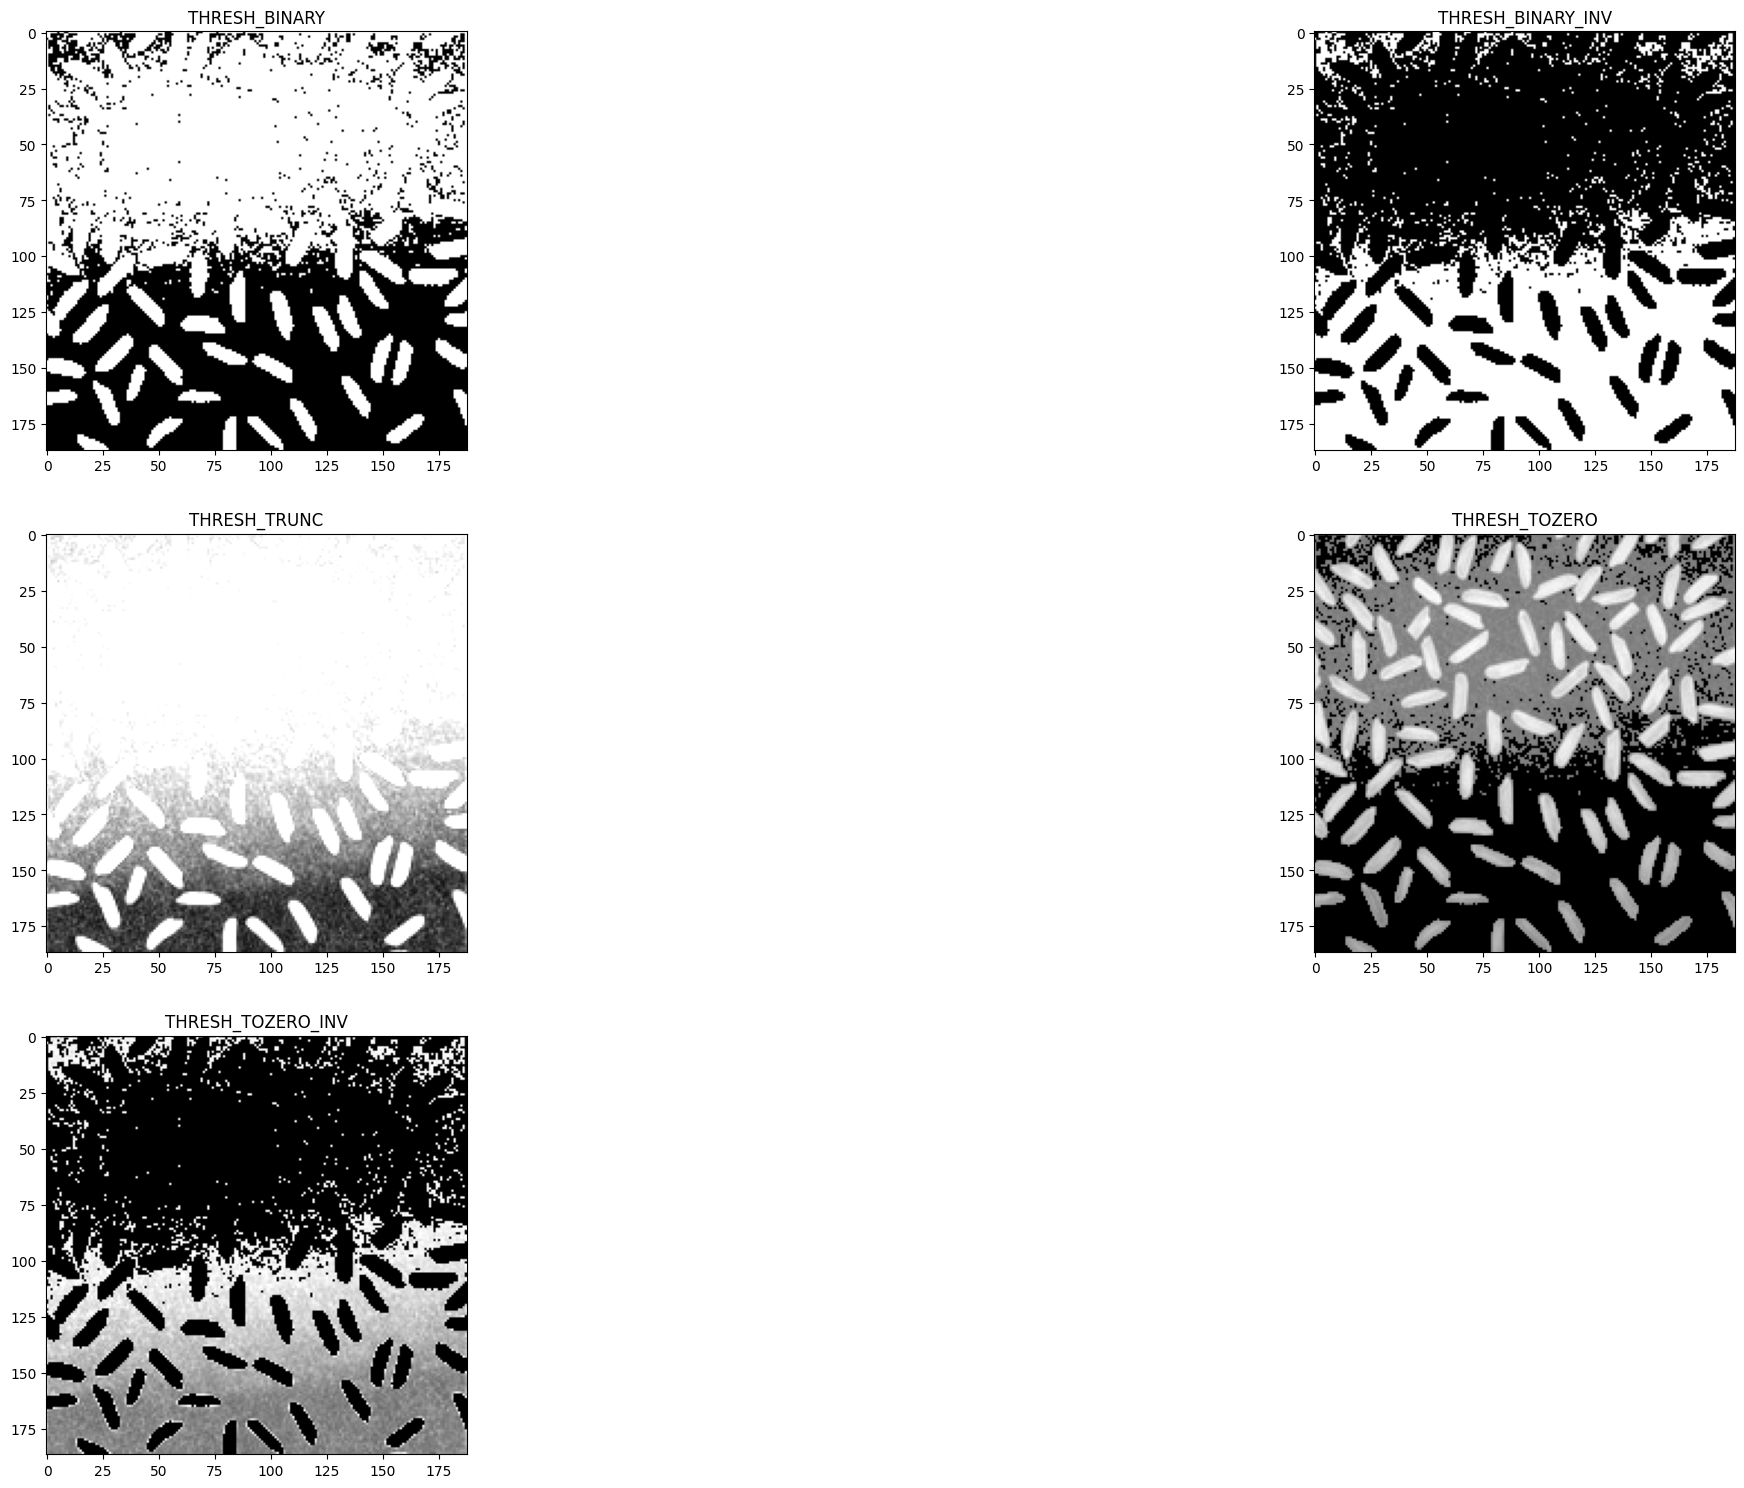

In [4]:
def different_thresholding(image, threshold):
    # Convert the image to grayscale
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # Set up the figure for displaying images
    plt.figure(figsize=(30, 25))
    
    # Apply different thresholding techniques and display results
    # THRESH_BINARY
    ret, thresh_binary = cv.threshold(gray_image, threshold, 255, cv.THRESH_BINARY)
    plt.subplot(4, 2, 1)
    plt.title("THRESH_BINARY")
    plt.imshow(thresh_binary, cmap='gray')
    
    # THRESH_BINARY_INV
    ret, thresh_binary_inv = cv.threshold(gray_image, threshold, 255, cv.THRESH_BINARY_INV)
    plt.subplot(4, 2, 2)
    plt.title("THRESH_BINARY_INV")
    plt.imshow(thresh_binary_inv, cmap='gray')
    
    # THRESH_TRUNC
    ret, thresh_trunc = cv.threshold(gray_image, threshold, 255, cv.THRESH_TRUNC)
    plt.subplot(4, 2, 3)
    plt.title("THRESH_TRUNC")
    plt.imshow(thresh_trunc, cmap='gray')
    
    # THRESH_TOZERO
    ret, thresh_tozero = cv.threshold(gray_image, threshold, 255, cv.THRESH_TOZERO)
    plt.subplot(4, 2, 4)
    plt.title("THRESH_TOZERO")
    plt.imshow(thresh_tozero, cmap='gray')
    
    # THRESH_TOZERO_INV
    ret, thresh_tozero_inv = cv.threshold(gray_image, threshold, 255, cv.THRESH_TOZERO_INV)
    plt.subplot(4, 2, 5)
    plt.title("THRESH_TOZERO_INV")
    plt.imshow(thresh_tozero_inv, cmap='gray')
    
    # Display the results
    plt.show()
    
    return 0

# Example usage
image = cv.imread(image_path)

if image is not None:
    different_thresholding(image, 100) # Exemple fo threshold = 100
else:
    print(f"Error: Could not load image from {image_path}")


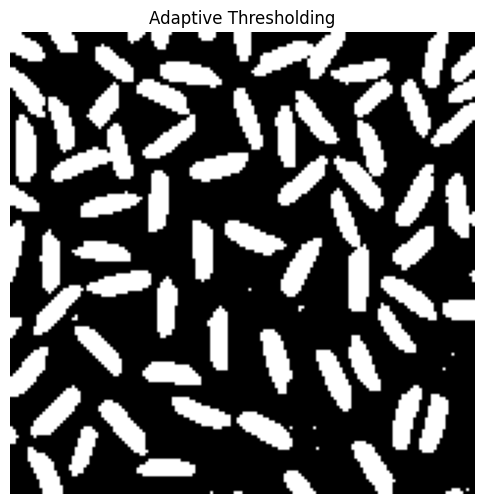

In [5]:
def adaptive_thresholding(I, nv, e):
    """
    Parameters:
    I (numpy.ndarray): Input grayscale image.
    nv (int): Number of neighbors for the local window.
    e (float): Tolerance value for thresholding.
    """

    (l, c) = np.shape(I)
    img = np.zeros((l - nv * 2, c - nv * 2))
    
    for i in range(nv, l - nv):
        for j in range(nv, c - nv):
            local_window = I[i - nv:i + nv + 1, j - nv:j + nv + 1]
            local_mean = np.mean(local_window)  # Calculate the mean intensity of the local window
            if I[i, j] + e > local_mean:  # If the pixel intensity is higher than the local mean plus tolerance
                img[i - nv, j - nv] = 255
            else:
                img[i - nv, j - nv] = 0  # If the pixel intensity is lower or equal to the local mean plus tolerance
    
    plt.figure(figsize=(6, 6))
    plt.title('Adaptive Thresholding')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    
    return 0

# Example usage
image = cv.imread(image_path)

if image is not None:
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    adaptive_thresholding(gray_image, 15, 0.5)
else:
    print(f"Error: Could not load image from {image_path}")

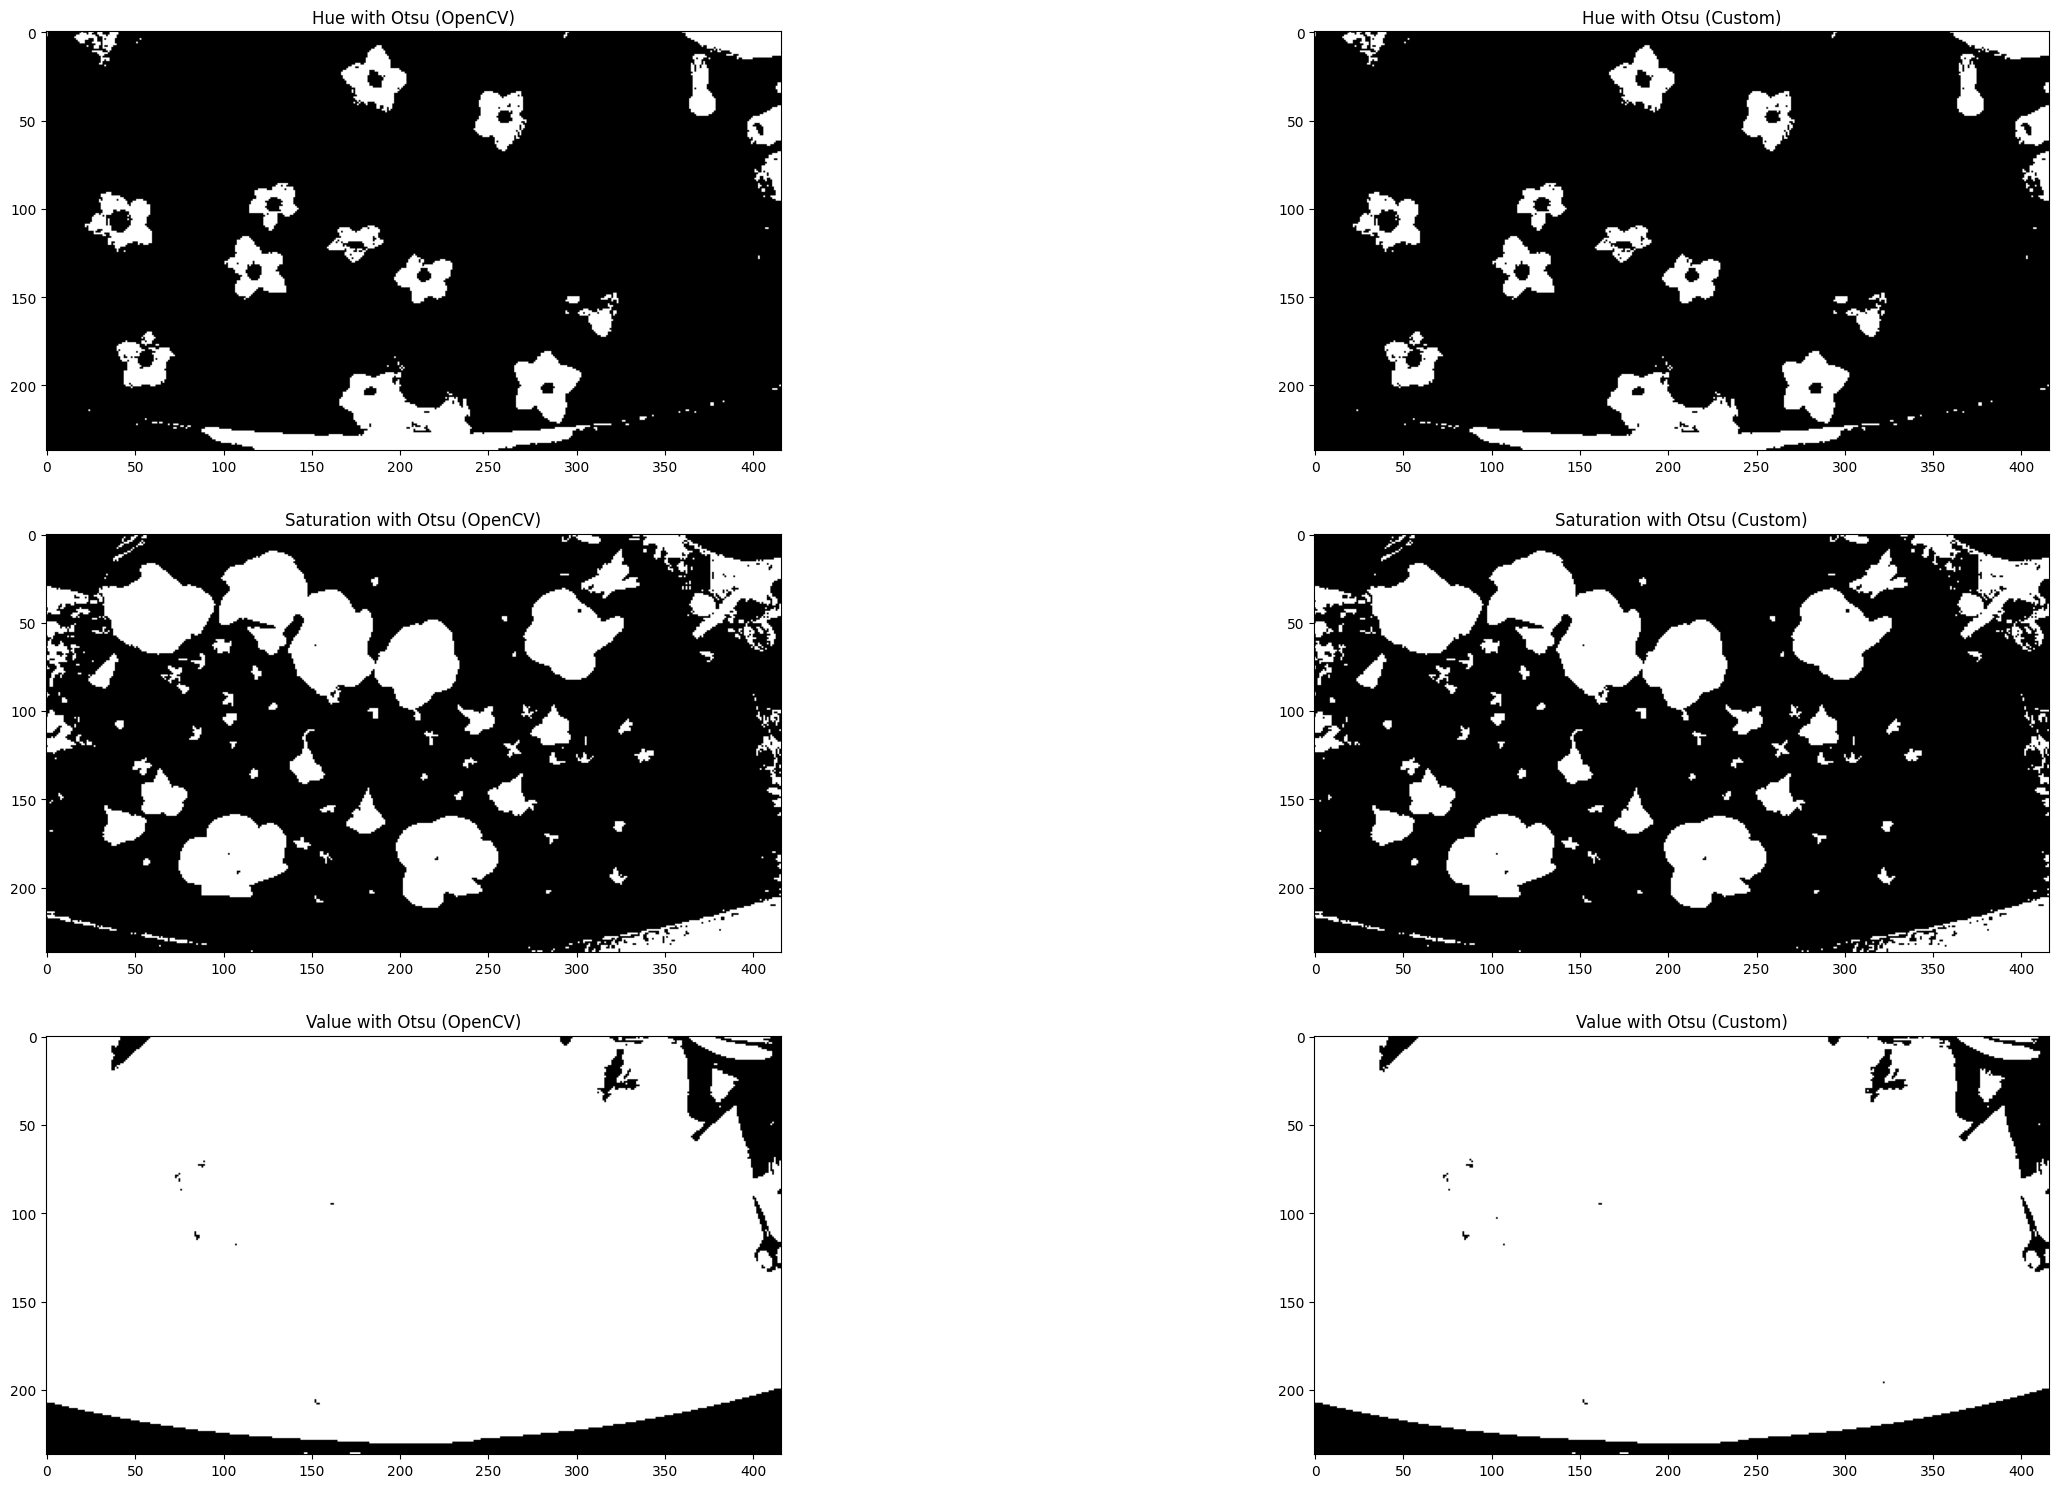

In [6]:
def otsu(gray):
    """
    Applies Otsu's thresholding method to a grayscale image.

    Parameters:
    gray (numpy.ndarray): Input grayscale image.

    Returns:
    numpy.ndarray: Binary image after applying Otsu's thresholding.
    """
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    his, bins = np.histogram(gray, np.arange(0, 257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    
    for t in bins[:-1]:  # Ignore the last bin edge
        pcb = np.sum(his[:t])  # Probability of a pixel being in class 1
        pcf = np.sum(his[t:])  # Probability of a pixel being in class 2
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        
        if pcb == 0 or pcf == 0:
            continue
        
        mub = np.sum(intensity_arr[:t] * his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:] * his[t:]) / float(pcf)
        
        value = Wb * Wf * (mub - muf) ** 2
        
        if value > final_value:
            final_thresh = t
            final_value = value
            
    final_img = gray.copy()
    final_img[gray > final_thresh] = 255
    final_img[gray <= final_thresh] = 0

    return final_img

# Example usage
image_path = r'C:\Users\Yassine\Desktop\git\Segm\TPs_Segmentation/fleur.png'
img = cv.imread(image_path)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

# Apply OpenCV Otsu thresholding
ret_h, th_h = cv.threshold(h, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
ret_s, th_s = cv.threshold(s, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
ret_v, th_v = cv.threshold(v, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Apply custom Otsu thresholding
otsu_h = otsu(h)
otsu_s = otsu(s)
otsu_v = otsu(v)

# Display the results
plt.figure(figsize=(30, 25))

plt.subplot(4, 2, 1)
plt.imshow(th_h, cmap="gray")
plt.title("Hue with Otsu (OpenCV)")

plt.subplot(4, 2, 2)
plt.imshow(otsu_h, cmap="gray")
plt.title("Hue with Otsu (Custom)")

plt.subplot(4, 2, 3)
plt.imshow(th_s, cmap="gray")
plt.title("Saturation with Otsu (OpenCV)")

plt.subplot(4, 2, 4)
plt.imshow(otsu_s, cmap="gray")
plt.title("Saturation with Otsu (Custom)")

plt.subplot(4, 2, 5)
plt.imshow(th_v, cmap="gray")
plt.title("Value with Otsu (OpenCV)")

plt.subplot(4, 2, 6)
plt.imshow(otsu_v, cmap="gray")
plt.title("Value with Otsu (Custom)")

plt.show()


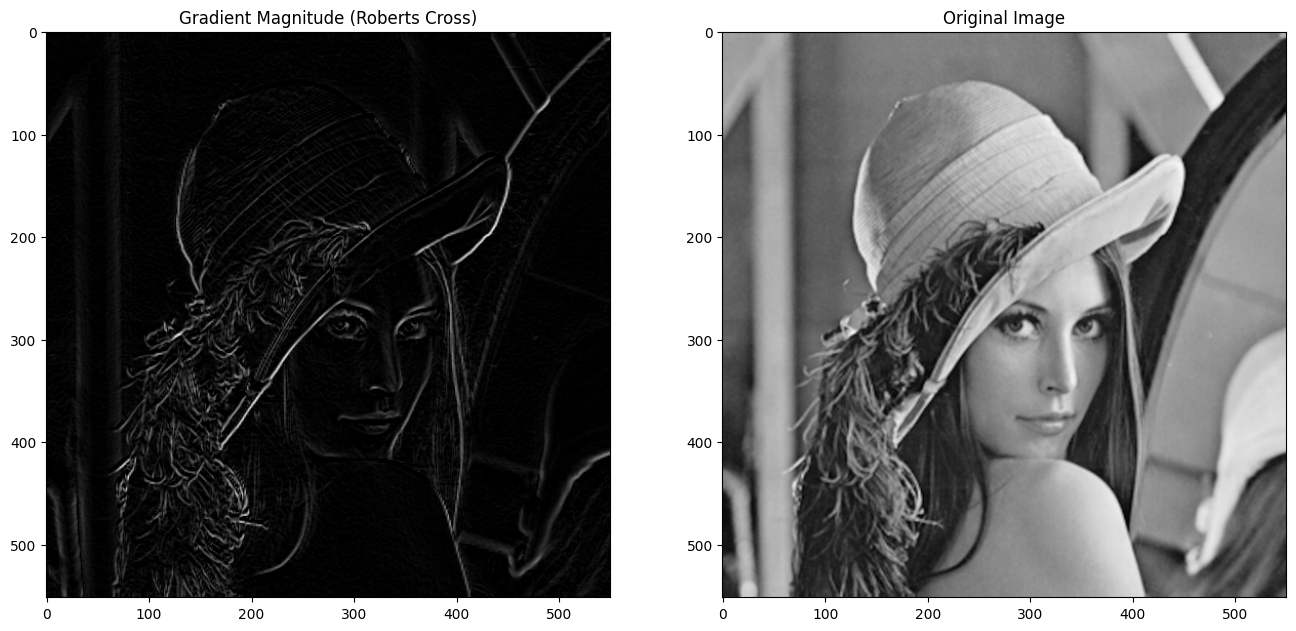

In [7]:
image_path = r'C:\Users\Yassine\Desktop\git\Segm\TPs_Segmentation\Lena.png'
image = cv.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Define the Roberts Cross kernels
    kernel_xr = np.array([[1, 0], [0, -1]])
    kernel_yr = np.array([[0, 1], [-1, 0]])

    # Apply the Roberts Cross kernels to the image
    img_robertx = cv.filter2D(gray_image, -1, kernel_xr)
    img_roberty = cv.filter2D(gray_image, -1, kernel_yr)

    # Compute the gradient magnitude
    gradient_magnitude = np.hypot(img_robertx, img_roberty)
    norme = np.hypot(img_robertx,img_roberty)

    # Display the results
    plt.figure(figsize=(16, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(gradient_magnitude, cmap="gray")
    plt.title("Gradient Magnitude (Roberts Cross)")

    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap="gray")
    plt.title("Original Image")

    plt.show()

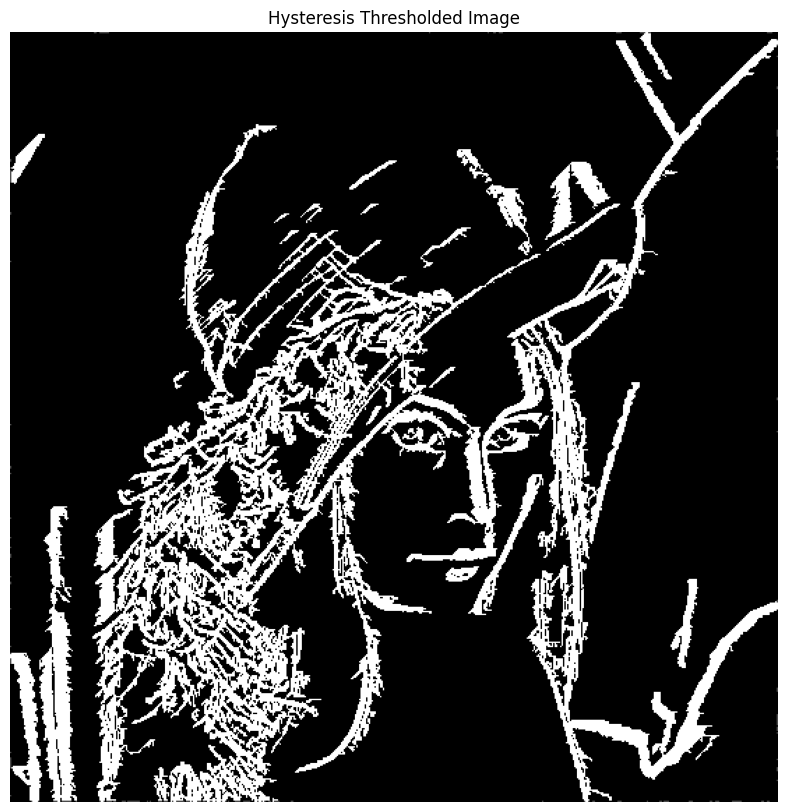

In [8]:

def hysteresis_thresholding(non_maximum, high_threshold, low_threshold):
    """
    Applies hysteresis thresholding to an edge-detected image.

    Parameters:
    non_maximum (numpy.ndarray): Input image after non-maximum suppression.
    high_threshold (float): High threshold value for strong edges.
    low_threshold (float): Low threshold value for weak edges.

    Returns:
    numpy.ndarray: Binary image after applying hysteresis thresholding.
    """
    # Initialize output image
    M, N = non_maximum.shape
    out = np.zeros((M, N), dtype=np.uint8)

    # Identify strong edges (pixels above high_threshold)
    strong_i, strong_j = np.where(non_maximum >= high_threshold)
    # Identify weak edges (pixels between low_threshold and high_threshold)
    weak_i, weak_j = np.where((non_maximum >= low_threshold) & (non_maximum < high_threshold))
    # Identify non-edges (pixels below low_threshold)
    zeros_i, zeros_j = np.where(non_maximum < low_threshold)

    # Set the pixel values in the output image
    out[strong_i, strong_j] = 255
    out[zeros_i, zeros_j] = 0
    out[weak_i, weak_j] = 75

    # Perform hysteresis: link weak edges to strong edges
    for i in range(1, M - 1):
        for j in range(1, N - 1):
            if out[i, j] == 75:
                # If a weak edge pixel is connected to any strong edge pixel, it becomes a strong edge
                if 255 in [out[i + 1, j - 1], out[i + 1, j], out[i + 1, j + 1],
                           out[i, j - 1], out[i, j + 1],
                           out[i - 1, j - 1], out[i - 1, j], out[i - 1, j + 1]]:
                    out[i, j] = 255
                else:
                    out[i, j] = 0

    return out

# Example usage
S = hysteresis_thresholding(norme, 20, 5)
plt.figure(figsize=(16, 10))
plt.imshow(S, cmap="gray")
plt.title("Hysteresis Thresholded Image")
plt.axis('off')  # Remove axes for a cleaner look
plt.show()
